<h1>Math</h1>

we start by looking at the word2vec algorithm

recall what we discussed previously (notebook 27) , we discussed how we can create language models using bigrams , that a probability of the next word given the current word , crucially we use a neural network to accomplish this 

Bigram model :

$$p(x_{t+1}|x_t) = softmax \left( W^{(2)T} f \left( W^{(1)T}x_t\right) \right)$$

<img src='extras/28.1.PNG' width = '400'></img>

we were also introduced to word embeddings , and we looked at how to work with word vectors , amongst this we stressed on a single fact , a word embedding matrix is just a matrix of size VxD , but wait a minute !

if we look at our bigram neural network model what do we see ,  what we see is exactly a matrix that could be used as a word embedding , in fact this neural netowk has 2 matricies of size (VxD) because the input is of size V and the output is of size V

So what we can conclude is that , if we use a meural network to find word embeddings , look no further than the bigram model , we already know how to implement this so the next question would be : Does it give good embeddings ?

The answer is no , but anyways this is our job now , word2vec is an extension of the bigram model that would yeild better results 

<h1>Math</h1>

se start by looking at one extension on the simple bigram that makes it into a word2vec algorithm

This is called CBOW - continuous bag of words

---

<h4>CBOW</h4>

The basic idea is this , instead of having just one input word to try to predict hte next word , instead we are goinf to have a wjole list of words trying to predict a word in the middle

lets take an example , consider the following sentence

<p>The quick <span style="color:blue">brown fox <span style="color:green">jumps</span> over the</span> lazy dog</p>

Then an example of a training sample for CBOW would be input : [brown,fox,over,the] , output : [jumps]

<img src='extras/28.2.PNG' width='400'></img>

In this example , we would say that the context size is 2 , since we have gone 2 words to the left and 2 words to the right (depending on the author , context size may also refer to the total number of surrounding words which in this case is 4)

In practice , context size is usually set from 5-10 (on either side) , of course this is a hyperparameter that may require some tuning

Another thing that might not be clear is that the input weight $W^{(1)}$ is the same shared weight for all the input words , this is just the input weight in the bigram repeared however many times we have a context word

---

<h4>Why does it make sense ?</h4>

Lets try to get some intuition on why this kind of model might make sense

recall that this is not the first time we have seen this in 'article spinning'


for a simple article spinner , consider the following two sentences:

"I walked to the store"

"I went to the store"

these more or less have the same meaning , so if we replace one setence with another in a story that we are writing it would essentialy have no effect on how this story is interpreted which is what we want

so one simple way of making these modifications is to come up with a language model where the current word is not only conditioned on the previous word (as in a bigram) , but on the next word as well

so we want to find the probabilities : 

$$p(w_t \vert w_{t-1},w_{t+1})$$

Then sample from them to get words that can replace original

If we think about it , this is exactly like our CBOW model with a context size of 1

As usual , these probabilities can be found by counting or by the use of a neural network (which is what we are doing in this case)

---

<h4>The mechanics of CBOW</h4>

lets now dig in to the model itself and the details of how it really works so that we have some idea of how we would implement it

note that we wont be implementing the CBOW variant of word2vec since other methods have been shown to work better , but its a good start since it is the most intuitive

This picture should give us a good idea of what is going on

<img src='extras/28.3.PNG' width='300'></img>

for each word in the context we grab its word embedding , we call that $W^{(1)}_c$ , that is the cth row of $W^{(1)}$

Then (probably not clear in picture) we take the mean of all these vectors 

$$h = \frac{1}{\vert C \vert} \sum_{c \in C} W^{(1)} c$$

now we can see why we call this bag of words since it looks like the bag of words classifier we looked at previously but in this case we are not yet done

This only gives us the value at the hidden layer , we still need to predict the middle word , in order to do that

$$p(y|C) = softmax \left( W^{(2)T} h\right)$$

note that there is no hidden activation function

normally in deep learning we do use a hidden activation in order to make the mode lnon-linear

but in all of the word2vec algorithms non-linear hidden activation functions are not used , interestingly both word2vec and GloVe are linear models , they are part of the "Deep Learning Family" but there is actually nothing deep about the models thaey are based on  

<h1>Math</h1>

Next is another method to extend the bigram called the skipgram

---

<h4>Skipgram</h4>

what we will see that the skip gram is kind of the opposite of what we learned about which waas CBOW

back to our example:

<p>The quick <span style="color:blue">brown fox <span style="color:green">jumps</span> over the</span> lazy dog</p>

recall that for CBOW , input : [brown,fox,over,the] , and we try to predict [jumps]

with skipgram we do the opposite , we instead take the word jumps as input and we try to predict all 4 words [brown,fox,over,the]

<img src='extras/28.4.PNG' width='400'></img>

<img src='extras/28.5.PNG' width='300'></img>

lets try to explain this in terms we know about

It is helpful to think in terms of bigram , one training sample for this model would be input : jumps , target : over , this makes sense since we do softmax at the end and we try to predict one word

with the skipgram we can do the same thing except we can pretend that now there are three more training samples for a total of 4 training samples , so here are all our samples

<ul>
    <li>jumps $\rightarrow$ over</li>
    <li>jumps $\rightarrow$ brown</li>
    <li>jumps $\rightarrow$ fox</li>
    <li>jumps $\rightarrow$ the</li>
</ul>

again thats just like our bigram neural network with more training samples added to it

in particular , instead of having just bigrams we are also adding pair of words which come from the context , it is like a bigram but we are skipping a few words in between , hence the term skipgrams

---

<h4>1 problem - 2 perspectives</h4>

we have 2 different ways of thinking of the same problem

The first way is to think of one sample as one word with four targets "4-headed dragon" , that means we have a shared output weight $W^{(2)}$ that repeats 4 times , we have 4 softmaxes , 4 predictions and 4 errors summed to get total error

The other way (probably much simpler) , is to think of it as 4 different samples each with one input word and one target word (each has 1 softmax and 1 prediction) , in the end we still end up summing the individual errors since we are doing batch gradient descent , so mathematically these two are equivalent

---

<h4>Good Accuracy ?</h4>

normally when we build a neural network classifier we are trying to get good accuracy

in other words for a certain input , we are always trying to predict a certain target

but in this case that actually doesnot make any sense , we have a single input and we are actually trying to make it hit multiple targets

so a good reminder is that with language modelling the notion of accuracy is meaningless

There is no such thing as good accuracy because a single word can be pointing to any number of other words , and we can see that directly now even with just one sample

we will be using skipgram , but there are still some more modifications to make in order for it to work better

<h1>Math</h1>

Next is yet another modification we need to make in order to get our final word2vec model , this is called Hierarchical Softmax

---

<h4>Hierarchical Softmax</h4>

first lets talk about the motivation behind Hierarchical Softmax

In any language model when we are trying to predict a word then our output , which we are going to do a softmax over , is going to have a very large dimensionality , the number of outputs have to be of size V (size of vocabulary)

V can be extremely large , pretrained GloVe - V = 400,000 , pretrained word2vec , V = 3 million , we wont have to worry about these large numbers since we ourselves will limit our vocabulary to be much smaller for educational purposes

---

<h4>Large number of output classes</h4>

first we know emperically (based on experimental evidence) that this negatively affects accuracy

Mathematically , if we have 3 million classes , we have to pick the correct answer out of 3 million possible answers !

Thats basically saying that 1 is right and 2,999,999 are wrong

Now suppose that each word is equally represented at the targets , that means that 99.99997% of the time , any given word is not the target

The proportion of time that a word spends being the target is just 1 out of 3 million

in other words , we spend the majority of the time pushing the answer away from words than we do trying to get it towards the right asnwer (we will return to this point shortly just skip if not clear)

---

<h4>Softmax</h4>

consider the formula for Softmax

$$p(y=j|x) = \frac{\exp(w_j^Tx)}{\boxed{\sum\limits^V_{k=1}}\exp(w_k^Tx)}$$

is says that whenever we want to compute the output probability we need to first exponentiate each output node and then some over all the values

Taking this sum is $O(V)$ , and so if V is large , then thats going to make thing s extremely slow

looking at the equation makes it easier to understand the previous problem , to compute the probability for $p(y=j|x)$ the softmax requires all the vectors in $W^{(2)}$ (to calculate the denominator) not just $w_j$ this means that when we backpropagate , 1 out of 3M of our computation will be to get closer to the correct word and 2,999,999 out of 3,000,000 will be to get away from the wrong words

---

<h4>Solutions</h4>

There are two solutions to this , but we will spend the majority of our efforts focusing on the method that has been shown to work best

In either of these solutions what we want to do is get rid of the softmax entirely

The first solution (the one we wont focus on) is Hierarchical softmax

for hierarchical softmax the basic idea is this , instead of trying to predict whether or not the output word belongs to 1 of the 3 million classes all at the same time , lets instead break it down into a binary tree

<img src='extras/28.6.PNG' width='300'></img>

so for example , one side may be responsible for 1M words and the other side may be responsible for the other 2M , then this 2M could be further split into 2M at the left and 1M at the right and at every node we keep splitting into 2 until eventually we get into a single word , so every leaf node in this tree represents a word

This also means that every path dont go down doesnot need to be considered

---

<h4>more details</h4>

1) since at every node we have to make a binary decision we can use the sigmoid for this , this tells us the probability that we should go right or left

$$p(go \ right) = \sigma(v_{node}^Th)$$

typically we can say that the sigmoid outputs the probability of going right so then the probability of going left is just $1 - p(go \ right)$

2) in order to get the final probability of a single word represented by a leaf all we need to do is mulyiply all the individual probability along the path of the tree from the root to that node

<img src='extras/28.7.PNG' width='300'></img>

$$p(w|input) = \prod_{node \in path \ to \ w} \sigma(v_{node}^T h_{input})$$

since this is a probability tree , we know that all the probabilities at the leaf nodes will sum up to 1

Here are some examples :

<ul>
    <li>$p(cat) = 0.4$</li>
    <li>$p(racoon) = 0.6 \times 0.7 = 0.42$</li>
    <li>$p(dog) = 0.6 \times 0.3 \times 0,1 = 0.018$</li>
    <li>$p(apple) = 0.6 \times 0.3 \times 0.9 = 0.162$</li>
</ul>

sum = 1 , just like a softmax should , so that why we say that the hierarchical softmax is an approximation to the softmax

3) since we have a binary tree , there is no need for a DxV output matrix , this huge matrix also leads to slowness in the naive model 

recall that we have 2 matricies , input to hidden size VxD , and output size DxV

The input to hidden matrix is not a problem , since when we have an input word , all we do is use that as an index 

But for the output matrix , the naive approach requires us to do a full matrix multiply because h and $W^{(2)}$ are both dense

Now , at each node all we need to do is compute a scalar , so we just need a single vector of size D

now because the binary tree has $O(V)$ leaf nodes , its also going to have $O(V)$ weight vectors of size V , so every split of the tree has its own $V$ size vector $v_{node}$

The trick is most of these we never need to multiply with because we dont go down that path in the tree , in fact the number of operations we know need to do is $O(logV)$ since now this is a binary search

---

<h4>How to make this tree ? </h4>

The way this tree is formed has a big impact on performance so its quite important ,quite a bit of research has been done here are the links of some papers <a href = 'http://www.iro.umontreal.ca/~lisa/pointeurs/hierarchical-nnlm-aistats05.pdf
' >Hierarchical Softmax</a> , <a href = 'http://papers.nips.cc/paper/3583-a-scalable-hierarchical-distributed-language-model.pdf
' >More about Hierarchical Softmax</a>

One trick to consider in regards to the hierarchical softmax is one good way of finding this tree

we know that words like "the","a","in" show up a lot in our data (infact "the" is the most frequent word in english language)

but words as "Microprocessor","programming","onomatopoeia" will be very infrequent

so what do we want ? 

we would like

<ul>
    <li>frequent words to be closer to the top , so we dont go that far down into the tree</li>
    <li>infrequent words to be closer to the bottom , since we dont mind going that far into the tree because thats just not going to happen very often</li>
</ul>

And so we can use a technique called "Huffman coding" which accomplished this optimally

<h1>Math</h1>

Now we move on to the second method which in comparison to Hierarchical Clustering is much simpler , This technique is called Negative Sampling

---

<h4>Negative Sampling</h4>

The basic idea is this , we discussed before how when using softmax , basically every word is going to be a non-target over 99% of the time

with softmax what we are saying is every word thats not the target is going to be considered wrong

<img src='extras/28.8.PNG' width='150'></img>

what negative sampling does is , instead of saying everyother word is wrong , we simply take a sample of these other words and say that some of them are wrong

<img src='extras/28.9.PNG' width='150'></img>

---

<h4>Multiclass and Binary Classification</h4>

lets look exactly at how this is implemented so we get a clear picture

first we need to consider the difference between multiclass and binary classification


<strong>Multiclass :</strong>

we normally use the softmax to get predictions

$$p(y_{out}|x_{in}) = \frac{\exp(W^{(2)^{\ \ T}}_{\ \ out}W^{(1)}_{\ \ in})}{\sum\limits^V_{j=1}\exp(W^{(2)^T}_{\ \ j} W^{(1)}_{\ \ in})}$$

Then we use the multiclass cross entropy as our objective

$$J = t_{out} \log p(y_{out}|x_in)$$

note : the above is the positive form , so this is just the log likelihood


<strong>Binary :</strong>

we use the sigmoid to get our predictions

$$p(y_{out} = 1 | x_{in}) = \sigma(W^{(2)^{\ \ T}}_{\ \ out} W^{(1)}_{in})$$

then we use the binary cross entropy as our cost

$$J = t_{out} logp(y_{out}=1 \vert x_{in}) + (1-t_{out}) log (1-p(y_{out} = 1 \vert x_{in}))$$

note : again thats the likelihood

we have seen all these equations before , but now it is in the context of a bigram neural network model instead of just a general input feature x

---

<h4>Negative Sampling</h4>

so the idea behind negative sampling is , instead of doing softmax and doing the full softmax cross-entropy just forget about softmax :)

lets instead do a bunch of little binary cross-entropies

---

<h4>Example</h4>

again our example :

<p>The quick <span style="color:blue">brown fox <span style="color:green">jumps</span> over the</span> lazy dog</p>

Input word : <span style="color:green">jumps</span></span>

Target words : <span style="color:blue">brown,fox,over,the</span></span>

Negative samples : <span style="color:red">apple,orange,boat,tokyo</span></span>

note : the negative samples are just randomly sampled words in our vocabulary , so if we were to write these out explicitly , we would first calculate the following outputs

$$p(brown|jumps) = \sigma(W^{(2)^T}_{brown}W^{(1)}_{jumps})$$

$$p(fox|jumps) = \sigma(W^{(2)^T}_{fox}W^{(1)}_{jumps})$$

$$p(over|jumps) = \sigma(W^{(2)^T}_{over}W^{(1)}_{jumps})$$

$$p(the|jumps) = \sigma(W^{(2)^T}_{the}W^{(1)}_{jumps})$$

$$p(apple|jumps) = \sigma(W^{(2)^T}_{apple}W^{(1)}_{jumps})$$

$$p(orange|jumps) = \sigma(W^{(2)^T}_{orange}W^{(1)}_{jumps})$$

$$p(boat|jumps) = \sigma(W^{(2)^T}_{boat}W^{(1)}_{jumps})$$

$$p(tokyo|jumps) = \sigma(W^{(2)^T}_{tokyo}W^{(1)}_{jumps})$$

ok , so now we have these 8 posterior probabilities , what do we do with them ?

well of course now we can calculate the binary cross entropy

so we know that brown,fox,over, are all positive samples , and we know that apple,orange,boat,tokyo are all negative samples

so the full expression for the binary cross entropy becomes :

$$J = \log p(brown \vert jumps) + \log p(fox \vert jumps) + \log p(over \vert jumps) + \log p(the \vert jumps) + \log [1-p(apple \vert jumps)] + \log[1 - p(orange \vert jumps)] + \log[1-p(boat \vert jumps)] + \log[1-p(tokyo \vert jumps)]$$

note : this is what we want to maximise

notice how when we already know the labels of each word we dont need to specify the $t$s or the $1-t$s since we know this are going to evaluate to either 1 or 0

we can see how the problem with softmax is solved now , since $p(y_{out} = 1 | x_{in}) = \sigma(W^{(2)^{\ \ T}}_{\ \ out} W^{(1)}_{in})$ , the probability depends now only on vectors $W^{(2)}_{\ \ out} \ and \ W^{(1)}_{in}$ so when we backpropagate we need only to update these two , unlike the softmax the required us to update the entirety of $W^{(2)}$


---

we can generalise this equation to make it a little more compact

if we let C = set of context words and N = set of negative samples , then we can write the cost as 

$$J = \sum_{c \in C} \log \sigma \left(W^{(2)^T}_{\ \ c} W^{(1)}_{\ \ in}\right) + \sum_{n \in N} \log \left[1 - \sigma \left( W^{(2)^{\ T}}_n W^{(1)}_{\ in} \right)  \right]$$


now if we recall one identity we have when it comes to the sigmoid is that if we negate the logit , we get the opposite probability

so we write :

$$p(y=1 \vert x) = \sigma(logit) , p(y=0 \vert x) = \sigma(-logit)$$

$$\sigma(logit) + \sigma(-logit) = 1$$

so we can write the cost even more compactly by replacing the 1 - $\sigma(...)$ term

$$J = \sum_{c \in C} \log \sigma \left( W^{(2)^{\ \ T}}_{\ \ c} W^{(1)}_{\ \ in}\right) + \sum_{n \in N} \log \sigma \left( - W^{(2)^{\ T}}_{n} W^{(1)}_{\ \ in}\right)$$

---

<h4>Negative Sampling Gradient</h4>

since we will be implementing negative sampling , we want to derive the gradient , luckily this is just binary classification so this should be easy

lets return to the raw form of our loss since it is easier to work with :

$$J = -\sum^N_{n=1} t_{n} log p_{n} + (1-t_{n}) \log (1-p_n) $$

note : p refers to $p(y=1|x)$ , where y can refer to any output word

note : n now refers to sample index and N refers to toal number of samples in batch

recall that derivative of the cost wrt to $W^{(2)}$ was :

$$\frac{\partial J}{\partial W^{(2)}} = H^T(P-T)$$

note : this is the same derivative we get when we do binary logistic regression (for full derivation refer to notebook 5)

note : here H just refers to the value at the hidden layer

note : as usual we use capital letters to reger to the full array of things , P : a vector of all of the N output probabilities whereas $p_n$ refers to the output probability at the nth sample

H refers to the word vector of the input word , and in fact , unlike the general case where we have and NxD matrix H is just a D size vector because it is just the word vector for the single input word

---

<h4>Problem!</h4>

This might sound conufing at first lets see why

$$\frac{\partial J}{\partial W^{(2)}} = H^T (P-T)$$

$H = W^{(1)}_{input} $ (a vector of length D)

P - T (vector of length N)

so it doesnot seem like we can multiply these since they are two vectors of different sizes

---

<h4>Fixing the problem</h4>

it helps to think about just a single sample to see what we really want to do

suppose we have 1 sample , so N = 1 , then what we want is multiply $W^{(1)}_{input}$ , which is a D-size vector ,  by P-T , which is now a scalar , a scalar multiplied by a vector is allowed

now whats the update we want to do here 

well , we dont want to update the entirety of $W^{(2)}$ because the entirety of $W^{(2)}$ doesnot influence this output , in fact only $W^{(2)}_{output}$ affects the current word , this applies to both positive and negative samples since that is handeled by T

$$\frac{\partial J}{\partial W^{(2)}_{output}} = W^{(1)}_{input}(P-T)$$


<img src='extras/28.10.PNG' width='200'></img>

so here only the blue line needs to be updated , all other output weights do not contribute to that output

---

<h4>Fixing multiple samples</h4>

now what happens if we have N samples , well we dont need to think so abstractically , say we have 3 samples , N = 3

Then we just have 3 output vectors to update which are all slices of $W^{(2)}$

so we cab see gere that we have 3 vector equations

$$\frac{\partial J}{\partial W^{(2)}_{brown}} = W^{(1)}_{jumps} \left(p_{brown} - t_{brown} \right)$$

$$\frac{\partial J}{\partial W^{(2)}_{fox}} = W^{(1)}_{jumps} \left(p_{fox} - t_{fox} \right)$$

$$\frac{\partial J}{\partial W^{(2)}_{over}} = W^{(1)}_{jumps} \left(p_{over} - t_{over} \right)$$

Theoretically we could just use a python for loop to calculate these updates but we dont like python for loops

so how can we further vectorise this operation ?

well this is just the outer product of $W^{(1)}_{input}$ and $P-T$ , so we can write :

$$\frac{\partial J}{\partial W^{(2)}_c} = np.outer\left( W^{(1)}_{jumps} , \left(P_c - T_c \right) \right) , C = \{brown,fox,over\}$$

note that the slice of $W^{(2)}$ that needs updating is of size <u>DxN</u> , since we have selected N columns out of the full $W^{(2)}$ matrix which is of size VxD , these N columns correspond to either the context words or the negative samples

As a revision of how outer product works , for vectors a and b indexed by i and j respectively , the outer product C = np.outer(a,b) is defined as $C(i,j) = a(i)b(j)$

The outer product of $W^{(1)}_{jumps}$ (size D) and P-T (size N) is also <u>DxN</u> since we have N output words and each is represented by a vector of length D

---

<h4>updating the input weight</h4>

Now that we have the update for $W^{(2)}$ what about $W^{(1)}$ ?

This is easier since there is only 1 row of $W^{(1)}$ to update , that is the row which belongs to the input word

Yet it is harder since we need to apply the chain rule , the further back we go in a neural network the more terms we need to consider

The important thing to note is that there is no hidden activation function , this is equivalent to the activation function being identity which means its derivative is 1

ok lets do it from scratch :)

$$\frac{\partial J}{\partial a_n} = - \frac{\partial}{\partial a_n} \left[t_n log \sigma(a_n) + (1-t_n) log \{ 1 - \sigma(a_n)\} \right]$$

$$\frac{\partial J}{\partial a_n} = - \frac{t_n}{\sigma(a_n)} \frac{\partial \sigma (a_n)}{\partial a_n} + \frac{1-t_n}{1-\sigma(a_n)}\frac{\partial \sigma(a_n)}{\partial a_n}$$

$$\frac{\partial J}{\partial a_n} = \left[ - \frac{t_n}{\sigma(a_n)} \frac{1-t_n}{1-\sigma(a_n)}\right]\sigma(a_n) \left[ 1 - \sigma(a_n) \right]$$

$$\frac{\partial J}{\partial a_n} = -t_n \left[ 1 - \sigma(a_n) \right] + (1-t_n)\sigma(a_n)$$

$$\frac{\partial J}{\partial a_n} = \sigma(a_n) - t_n = p_n - t_n$$

now we also know that :

$$a_n = W^{(2)^{\ \ T}}_{\ \ out(n)} W^{(1)}_{\ \ in}$$

so we can apply the chain rule to get the rest of the expression

$$\frac{\partial J}{\partial W^{(1)}_{\ \ in}} = \sum^N_{n=1} \frac{\partial J}{\partial a_n}\frac{\partial a_n}{\partial W^{(1)}_{\ \ in}}$$

$$\frac{\partial J}{\partial W^{(1)}_{\ \ in}} = \sum^N_{n=1} \left( p_n - t_n\right) \frac{\partial W^{(2)^{\ \ T}}_{\ out(n)} W^{(1)}_{\ in}}{\partial W^{(1)}_{\ in}}$$

$$\frac{\partial J}{\partial W^{(1)}_{\ in }} = \sum^N_{n=1} \left(p_n-t_n\right) W^{(2)}_{out(n)}$$

notice how this makes a lot of sense , the gradient for $W^{(1)}_{ \ in}$ is dependant on the error at all N output nodes and the weight going to those output nodes

<img src='extras/28.11.PNG' width='200'></img>

<h1>Math</h1>

Next we need to consider some little details about Negative sampling , these will be needed for the implementation

---

The first obvious question is , how many negative samples should you chose ?

The answer is normally a number like 5 or 10 is chosen or maybe as ahigh as 25 , this is a hyperparameter and thus should be always optimised to our particular dataset

---

The second question is how do we actually choose the negative samples ?

One may assume a uniform distribution but thats not the case , instead we sample from a modified unigram distribution

A unigram distribution is just the probability of a single word occuring - lets call that $p(w)$ 

How can we estimate $p(w)$ ?

As usual we can estimate it by counting 

$$p(w) = \frac{count(w)}{\sum\limits_{w'}count(w)}$$

But we are not done yet , the problem with this approach is that infrequent words are too infrequent and so they are very unlikely to ever be sampled

we can smooth out this distribution by raising all of our counts by 0.75 

0.75 is the typical value to be used , but it seems like we can change this value drastically and still get pretty reasonable results

$$\tilde p(w) = \frac{{count(w)}^{0.75}}{\sum\limits_{w'} {count(w')}^{0.75}}$$

the fact that this is not the true maximum likelihood estimate of the unigram distribution is why we call it the modified unigram distribution

---

consider our running example : "The quick brown fox jumps over the lazy dog"

input : jumps

context : brown,fox,over,the

But what if during our negative sampling procedure we accidently sample one of the context words ?

for example the is pretty frequent , so we might sample 'the' again in our negative samples

in word2vec this generally doesnot matter and so if we do end up considering one of the context words a positive sample and a negative sample at the same time , so be it

It would actually take a lot of work to renormalise the negative sampling distribution for each context , so we simply dont bother

---

we discussed before that with negative sampling we take a middle word , some context words which count as positive samples and then we pick some negative samples randomly from our vocabulary

BUT in the actual implementation , this is not what we are going to do , instead we are going to do something a little simpler

In particular we still have our middle word and our context so for our example :

<p>The quick <span style="color:blue">brown fox <span style="color:green">jumps</span> over the</span> lazy dog</p>

positive samples : 

<ul>
    <li>$jumps \rightarrow brown$</li>
    <li>$jumps \rightarrow fox$</li>
    <li>$jumps \rightarrow over$</li>
    <li>$jumps \rightarrow the$</li>
</ul>

but instead of coming up with negative samples for our context , we instead take one negative sample for the middle word

so what we would normally epect is to have the following as the negative samples

negative samples :

<ul>
    <li>$jumps \rightarrow boat$</li>
    <li>$jumps \rightarrow tokyo$</li>
    <li>$jumps \rightarrow phone$</li>
    <li>$jumps \rightarrow sea$</li>
</ul>

but what we actually do is sample a single random word , for ex: lighthouse , so now we will 4 new negative samples using this random word as the middle word but with the existing context

<p>The quick <span style="color:blue">brown fox <span style="color:red">lighthouse</span> over the</span> lazy dog</p>

and so our negative samples are (this is what we will use in our implementation ):

negative samples :

<ul>
    <li>$lighthouse \rightarrow brown$</li>
    <li>$lighthouse \rightarrow fox$</li>
    <li>$lighthouse \rightarrow over$</li>
    <li>$lighthouse \rightarrow the$</li>
</ul>

so just to reiterate this idea , usually when people talk about negative sampling they talk about it in terms of sampling context words with a fixed middle word

but during implementation we are going to fix the context words and insert an incorrect middle word

<h1>Math</h1>

If we jsut think back to the basic idea behind the bigram nerual network and the word2vec algorithm , but thinking back to the original idea , all we want to do is find a VxD matrix that has good word vectors

---

<h4>2 possible word embeddings</h4>

if we look at the architecture of a bigram neural network , we realise it has two of these , the first is VxD and the second is DxV (of course if we just transpose this we get a VxD matrix)

<img src = 'extras/28.1.PNG' width='400'></img>

so which one is the one we are interested in ?

---

<h4>which one do we choose ?</h4>

in reality either of these can serve as our final word vectors , but here are some things we can do :

<ul>
    <li>$W_{e} = W^{1}$<ul>
    <li>Just forget about the second weight matrix entirely , and just make the word embedding equal to the input to hidden weight</li>
    </ul></li>
    <li>$W_{e} = concat([W^{(1)},W^{(2)^T}]) \rightarrow shape \ is \ V\times2D$<ul>
    <li>The second way is to concatenate the two weights together</li>
    </ul></li>
    <li>$W_{e} = (W^{(1)}+W{(2)^T})/{2}$<ul>
    <li>just take the average of the two weights</li>
    </ul></li>
</ul>

in all three of these cases , sometimes people normalise all the vectors so that they have unit length , this also makes it so that they all lie on the unit sphere , of course if we are using cosine distance to find analogies this actually would not make a difference

$$\hat v = \frac{v}{\vert v \vert}$$
 




<h1>Math</h1>

now we want to look at some implementation tricks that can be useful when we implement word2vec

---

<h4>How to choose which words to train on</h4>

In the english language common words are very common and uncommon words are very common

if we plot a histogram of how often words are used we will get a very fat-tailed distribution

<img src='extras/28.12.PNG' width='300'></img>

that means we would spend an overwhelming majority of the time updating word vectors for very common words if we just ran through every sentence

so what we do with word2vec is we just drop a bunch of words

and we do so randomly , so each time we encounter a sentence we randomly drop some words according to some probability distribution , which is a function of the modified unigram distribution

$$p_{drop}(w) = 1 - \sqrt{\frac{threshold}{\tilde p (w)}}$$

a typical threshold will be set to something very low , ex : $10^{-5}$ , so what is the effect of this ?

say a word is very frequent , say $\tilde p(w) = 0.1$ , then $p_{drop}(w) = 1-10^{-2} = 0.99$ , so a 99% chance is that we should drop that word

now say $\tilde p(w) = 10^{-5}$ then we get 1-1 = 0 so we would never drop this word

in fact if the unigram probability is even lower than this (lower than the threshold) we get a negative number , meaning we also wont drop that word

---

Now this may not be obvious , but after we drop the words from the sentence we treat the sentence with dropped words as the final sentence we are going to train on
 
for ex if our sentence is :

"The quick brown fox jumps over the lazy dog"

suppose we drop the words 'the' and 'over'

then the effective sentence becomes :

'quick brown fox jumps lazy dog'

so now if our middle word is jumps then our context words becomes [brown,fox,lazy,dog]

note that before dropping any words , the words [lazy,dog] would not be part of this context 

so doing things this way technically has t he effect of widening the context window

---

<h4>Learning rate scheduling</h4>

The next implementation detail to talk about is learning rate scheduling , in word2vec we normally pick a maximum learning rate and a minimum learnign rate and then we reduce the learning rate linearly from max to min

---

<h4>Interesting (but not going to try)</h4>

we can greatly speed up training by working on multiple threads or cores (each responsible for a different subset of sentences)

ex: 1 thread takes 4 hours $\rightarrow$ 4 threads takes 1 hour

Use C/Cython : a lot of the work in word2vec is happening in python which is a slow language , we one thing we can try is writing some functions in Cython or just calling C functions , in fact the original implementation of word2vec is entirely in C

---

<h4>Built-in Softmax Alternatives</h4>

Tensorflow comes in with built-in softmax approximators suchs as the sampled siftmax loss ```tf.nn.sampled_softmax_loss``` and nce loss ```tf.nn.nce_loss```

while we wont study these, its good for us to know about them since they essentially fill the same role as the hierarchical softmax and negative sampling do

what's nice is that, since they are built in functions, they work a little faster

but what we found experimentally was that they did not work as well as negative sampling, at least for the small amount of data we will be using (instructor's comment)


<h1>code</h1>

In [1]:
# this happened to be too slow
# so we will be using multiprocessing !
# jupyter notebook doesnot seem to run processes from multiprocessing
# so we can just copy the following code to a .py file and run it
# the Boss reads the data splits the sentences into subsets
# it also computes the unigram and p_drop and sends data to each of the workers
# the workers work on the subset then they update the global weights
# locks are handeled automatically by multiprocessing library
# we can load the weights and continue training / try other analogies 

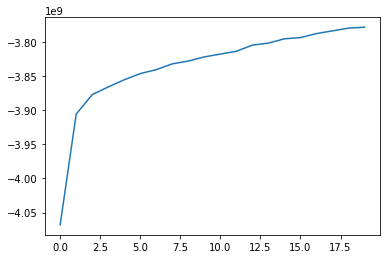

using W1 only : 
euclidean  distance : king - man = queen - woman
cosine  distance : king - man = queen - woman
------------------------------------------
using averaged weight matricies : 
euclidean  distance : king - man = queen - woman
cosine  distance : king - man = throne - woman
------------------------------------------
using concatenated weight matricies : 
euclidean  distance : king - man = queen - woman
cosine  distance : king - man = throne - woman
------------------------------------------
------------------------------------------
using W1 only : 
euclidean  distance : king - emperor = kingdom - empire
cosine  distance : king - emperor = kingdom - empire
------------------------------------------
using averaged weight matricies : 
euclidean  distance : king - emperor = kings - empire
cosine  distance : king - emperor = kingdom - empire
------------------------------------------
using concatenated weight matricies : 
euclidean  distance : king - emperor = kingdom - empire
c

using averaged weight matricies : 
euclidean  distance : fusion - fission = gather - disperse
cosine  distance : fusion - fission = gather - disperse
------------------------------------------
using concatenated weight matricies : 
euclidean  distance : fusion - fission = to - disperse
cosine  distance : fusion - fission = gather - disperse
------------------------------------------
------------------------------------------
using W1 only : 
euclidean  distance : proton - electron = positive - negative
cosine  distance : proton - electron = positive - negative
------------------------------------------
using averaged weight matricies : 
euclidean  distance : proton - electron = positive - negative
cosine  distance : proton - electron = positive - negative
------------------------------------------
using concatenated weight matricies : 
euclidean  distance : proton - electron = that - negative
cosine  distance : proton - electron = positive - negative
-----------------------------------

euclidean  distance : france - paris = korea - beijing
cosine  distance : france - paris = china - beijing
------------------------------------------
using concatenated weight matricies : 
euclidean  distance : france - paris = china - beijing
cosine  distance : france - paris = china - beijing
------------------------------------------
------------------------------------------
using W1 only : 
euclidean  distance : france - paris = italy - rome
cosine  distance : france - paris = papal - rome
------------------------------------------
using averaged weight matricies : 
euclidean  distance : france - paris = italy - rome
cosine  distance : france - paris = italy - rome
------------------------------------------
using concatenated weight matricies : 
euclidean  distance : france - paris = italy - rome
cosine  distance : france - paris = papacy - rome
------------------------------------------
------------------------------------------
using W1 only : 
euclidean  distance : france - par

In [2]:
# first we code word2vec from scratch
# then we will be using tensorflow

# this model provides several functionalities
# since training time is too long we can abort training and continue at any time by passing resume_training = True to fit function 
# this loads every thing and continues from last finished epoch
# we can also call load_weights to skip retraining and test some analogies

import json
import numpy as np
from glob import glob
import string
from sklearn.utils import shuffle 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances
import threading
import multiprocessing
from datetime import datetime
from multiprocessing import Process,Array,Value

# where we save our weights
path = 'outputs/word2vec/numpy/'

class Worker:

    # at the end of each epoch the last worker to finish should save the weights and cost
    def save_weights(self,start_epoch):
        costs = np.zeros(len(self.costs))
        costs[:start_epoch] = self.costs[:start_epoch]
        np.savez('weights.npz' , self.W1, self.W2,costs,start_epoch)
        print("woker: ",self.worker_id," created a checkpoint for epoch : ",start_epoch)
        print('----------------------------------------------------------------------')
        print('epoch: ',start_epoch,' cost: ',costs[start_epoch-1])
        print('----------------------------------------------------------------------')

    
    def __init__(self,worker_id,W1,W2,costs,V,D,counter,num_workers):
        self.worker_id = worker_id
        self.W1 = np.frombuffer(W1.get_obj()).reshape(V,D)
        self.W2 = np.frombuffer(W2.get_obj()).reshape(D,V)
        self.costs = np.frombuffer(costs.get_obj())
        self.V,self.D = V,D
        self.counter = np.frombuffer(counter.get_obj())
        self.num_workers = num_workers


    # takes a sentence , position of middle word , and context size
    # return context words
    
    def get_context(self,sent,middle,context_size):    
        context = []
        start = max(0,middle-context_size)
        # we will be using range so range(start,end) takes values start --> end-1
        # thats why we have middle+context+1
        end = min(middle+context_size+1,len(sent)) 
        for j in range(start,end): # j is the position of the context word in sentence
            if j == middle: # dont include middle word itself as target
                continue
            context.append(sent[j])    
        return context
    
    
    def sigmoid(self,a):
        return 1/(1+np.exp(-a))
    
    def cost(self,T,P,eps=1e-14):
        return np.sum(T*np.log(P+eps) + (1-T)*np.log(1-P+eps))
        
    def train(self,word,context,lr,T,eps):

        P = self.sigmoid(self.W1[word]@self.W2[:,context])

        gW2 = np.outer(self.W1[word],(P-T))         
        gW1 = np.sum((P-T)*self.W2[:,context],axis=1)
        
        self.W2[:,context] -= lr*gW2
        self.W1[word] -= lr*gW1
        
        return self.cost(P,T,eps)
    
    def fit(self,sentences,positive_context,negative_context,initial_lr,final_lr,epochs,smoothing,threshold,epsilon,unigram,p_drop,start_epoch):
        # decrease learning rate linearly
    
        delta = (initial_lr-final_lr)/(epochs) 
        # now let the training begin 
        for epoch in range(start_epoch,epochs):
        
            cost = 0
            t0 = datetime.now()  
            lr = initial_lr - epoch*delta
            # shuffle sentences 
            sentences = shuffle(sentences)
            for i,sentence in enumerate(sentences):
        

                # first we need to drop words according to p drop
                sent = [w for w in sentence if np.random.random()<1-p_drop[w]]

                if len(sent) < 2: # no conetext
                    continue
                
                N = len(sent)
                # we will also shuffle the order of middle words
                # so we dont see samples of the same sentence in same order each time
                middle = np.random.choice(N,N,replace=False)
                
                for m in middle:
                    pos_word = sent[m]
                    pos_context = self.get_context(sent,m,positive_context)
                    # sample a word for negative sampling
                    neg_word = np.random.choice(self.V,p=unigram)
                    neg_context = self.get_context(sent,m,negative_context)
                    
                    # now we do gradient descent twice
                    # once for positive samples and once for negative
                    # recall that SGD is a must now since our update for W1 requires is for a single word
                    
                    c = self.train(pos_word,pos_context,lr,T=1,eps=epsilon)
                    cost += c
                    c = self.train(neg_word,neg_context,lr,T=0,eps=epsilon)
                    cost += c
                    
                if (i+1)%1000 == 0:
                    print("worker: ",self.worker_id,' epoch: ',epoch+1,'/',epochs,' finished training on: ',i+1,'/',len(sentences),' sentences')
            self.costs[epoch] += cost
            print("worker: ",self.worker_id,' epoch: ',epoch+1,' cost: ',cost,' time: ',datetime.now()-t0)
            # now each worker increments counter
            self.counter[epoch] += 1
            if (self.counter[epoch]%self.num_workers) == 0:
                self.save_weights(epoch+1)


class Boss:
    # save model parameters
    def save_params(self,word2idx,n_files,positive_context,negative_context,initial_lr,final_lr,epochs,smoothing,threshold,epsilon,unigram,p_drop,start_epoch):
        params = {'word2idx':word2idx,'n_files':n_files,'positive_context':positive_context,'negative_context':negative_context,'initial_lr':initial_lr,'final_lr':final_lr,'epochs':epochs,'smoothing':smoothing,'threshold':threshold,'epsilon':epsilon,'start_epoch':start_epoch}
        with open(path+'params.json' , 'w') as f:
            json.dump(params, f)
        np.savez('grams.npz' , unigram)

        # save model parameters
    def load_params(self):
        with open(path+'params.json') as f:
                params = json.load(f)

        n_files = params['n_files']
        positive_context = params['positive_context']
        negative_context = params['negative_context']
        initial_lr = params['initial_lr']
        final_lr = params['final_lr']
        epochs = params['epochs']
        smoothing = params['smoothing']
        threshold = params['threshold']
        epsilon = params['epsilon']
        npz = np.load(path+'grams.npz')
        unigram = npz['arr_0']
        p_drop = 1 - np.sqrt(threshold/unigram)


        return n_files,positive_context,negative_context,initial_lr,final_lr,epochs,smoothing,threshold,epsilon,unigram,p_drop
        
        
    # laod the weights
    # the workers does the saving
    def load_weights(self,get_w2i=True,get_start_epoch=False,plot_costs=False):
        if get_w2i:
            with open(path+'params.json') as f:
                self.word2idx = json.load(f)['word2idx']
        npz = np.load(path+'weights.npz')
        W1 = npz['arr_0']
        W2 = npz['arr_1']
        C = npz['arr_2']
        start_epoch = npz['arr_3']
        V,D = W1.shape
        self.V,self.D = V,D

        self.W1 = Array('d', V*D)
        W1_np = np.frombuffer(self.W1.get_obj()).reshape(V,D)
        np.copyto(W1_np,W1)

        self.W2 = Array('d', D*V)
        W2_np = np.frombuffer(self.W2.get_obj()).reshape(D,V)
        np.copyto(W2_np,W2)

        self.costs = Array('d', len(C))
        C_np = np.frombuffer(self.costs.get_obj())
        np.copyto(C_np,C)

        if plot_costs is True:
            plt.plot(C_np[:start_epoch])
            plt.show()
        if get_start_epoch is True:
            return start_epoch


    def get_analogy(self,w1,w2,w4):
        W1 = np.frombuffer(self.W1.get_obj()).reshape(self.V,self.D)
        W2 = np.frombuffer(self.W2.get_obj()).reshape(self.D,self.V)
        E = W1
        print('using W1 only : ')
        self.analogy(E,self.word2idx,w1,w2,w4)
        print('------------------------------------------')
        E = (W1+W2.T)/2
        print('using averaged weight matricies : ')
        self.analogy(E,self.word2idx,w1,w2,w4)
        print('------------------------------------------')
        E = np.concatenate((W1,W2.T),axis=1)
        print('using concatenated weight matricies : ')
        self.analogy(E,self.word2idx,w1,w2,w4)
        print('------------------------------------------')
        print('------------------------------------------')
        
        
    
    # king - man = ? - woman
    def analogy(self,E,word2idx,w1,w2,w4):
        # first lets get our vector
        D = E.shape[1]
        king = E[word2idx[w1]]
        man = E[word2idx[w2]]
        woman = E[word2idx[w4]]
        queen = king - man + woman

        # next we calculate the distance between our vector and all other vectors
        # once using euclidean distance then again using cosine
        idx2word = {v:k for k,v in word2idx.items()}
        metrics = ['euclidean','cosine',]

        for metric in metrics:
            distances = pairwise_distances(queen.reshape(1,D),E,metric=metric)
            # now we need to consider the 4 closest neighbours to that point
            # not to return a word in [w1,w2,w4]
            closest =  np.argpartition(distances[0], 4)[:4]
            closest = [idx2word[i] for i in closest]

            for word in closest:
                if word not in [w1,w2,w4]:
                    print(metric,' distance :',w1,"-",w2,'=',word,'-',w4)
                    break

    # a method that takes sentences and return tokens
    # should also remove punctuation
    def tokenise(self,sent):
        sent = sent.lower()
        sent = sent.translate(str.maketrans('','',string.punctuation))
        tokens = sent.split()
        return tokens
    
    # we want to implement a method that reads data from the wiki files
    # this should tokenise the sentences and return the tokenised sentences + word2idx
    # also we need to limit vocab size
    
    def get_sentences(self,path='datasets/wiki/',V=20000,n_files=None):
        files = glob(path+'*.txt')
        files = files[:n_files]
        # first we need to get word2count to identify our top words
        # we will make word2idx once we filter out the top words
        word2count = {}
        
        # this is a list of lists , each inner list is a sentence of indexes
        sentences = []
        
        # we need to limit covabulary
        # first we get word2count 
        print('counting words')

        for i,f in enumerate(files):
            for line in open(f,encoding = "utf8"):
                line = line.rstrip()
                if line and line[0] not in ('[', '*', '-', '|', '=', '{', '}'):
                    tokens = self.tokenise(line)
                    if len(tokens) < 2:
                        continue
                    for token in tokens:
                        word2count[token] = word2count.get(token,0) + 1

            print('finished counting : ',i+1,'/',len(files),' files')

        print('finisehd counting')
        print('processing files')

        # now we use word2count to identify most frequent words
        # we need the special <none> token to replace words that wont make it to our vocabulary
        words  = ['<none>'] + [w for (w,c) in sorted(word2count.items() , reverse=True, key=lambda x: x[1])[:V-1]] 
        word2idx = {w:i for w,i in zip(words,range(V))}
        none = word2idx['<none>']
        for i,f in enumerate(files):
            # in the wiki files each line is a paragraph , we will be taking each paragraph as a sentence
            # we also want to remove header lines
            for line in open(f,encoding = "utf8"):
                line = line.rstrip()
                # skip headers , ...
                if line and line[0] not in ('[', '*', '-', '|', '=', '{', '}'):
                    tokens = self.tokenise(line)
                    if len(tokens) < 2:
                        continue
                    # now we update word2idx and word2count
                    # and we append tokenised line to our sentences
                    sentence = [word2idx.get(token,none) for token in tokens]
                    sentences.append(sentence)

            print('finished processing : ',i+1,'/',len(files),' files')
        
        print('finished processing data')
        return sentences,word2idx
    
    def fit(self,sentences=None,word2idx=None,V = 20000 ,D = 300 ,n_files = None ,positive_context = 5 ,initial_lr = 0.025 ,final_lr = 0.0001 ,negative_context = 5 ,epochs= 20,smoothing = 0.75 ,threshold = 1e-5,epsilon=1e-14,load_weights=False,resume_training = False):
        if resume_training == False : # initialise everything
            if sentences is None :
                sentences,word2idx = self.get_sentences(V=V,n_files = n_files)
            
            start_epoch = 0
            V = V
            D = D
            self.V = V
            self.D = D

            if load_weights is False: # initialise new weights
                # this is the way we read and wruite to a shared array
                W1 = np.random.randn(V,D)
                self.W1 = Array('d', V*D)
                W1_np = np.frombuffer(self.W1.get_obj()).reshape(V,D)
                np.copyto(W1_np, W1)

                # same agin for W2
                W2 = np.random.randn(D,V)
                self.W2 = Array('d', D*V)
                W2_np = np.frombuffer(self.W2.get_obj()).reshape(D,V)
                np.copyto(W2_np, W2)

            else:
                self.load_weights(get_w2i=False)

            costs = np.zeros(epochs)
            self.costs = Array('d', epochs)
            costs_np = np.frombuffer(self.costs.get_obj())
            np.copyto(costs_np, costs)
            # first we want to get the unigram and p_drop
            unigram = np.zeros(V)
            for sentence in sentences:
                unigram[sentence] += 1

            unigram = unigram**smoothing
            unigram /= unigram.sum()

            p_drop = 1 - np.sqrt(threshold/unigram)

            # we will save the parameters of fit , so that we can resume training later if we want
            self.word2idx = word2idx
            self.save_params(word2idx,n_files,positive_context,negative_context,initial_lr,final_lr,epochs,smoothing,threshold,epsilon,unigram,p_drop,start_epoch)

        else: # lets load everything
            start_epoch = model.load_weights(get_start_epoch=True) # this load weights and costs also word2idx , return start epoch 
            V,D = self.V,self.D
            n_files,positive_context,negative_context,initial_lr,final_lr,epochs,smoothing,threshold,epsilon,unigram,p_drop = model.load_params()
            if sentences is None :
                sentences,word2idx = self.get_sentences(V=V,n_files = n_files)
            self.word2idx = word2idx


        # shared counter to know which worker finished training last for each epoch
        counter = Array('d', epochs)

        # first we get the number of available CPUs
        num_workers = multiprocessing.cpu_count() 
  
        subset_size = np.ceil(len(sentences)/num_workers).astype(int)
        # shuffle sentences before distributing to workers 
        sentences = shuffle(sentences)
        workers = []
        for worker_id in range(num_workers):
            worker = Worker(worker_id,self.W1,self.W2,self.costs,V,D,counter,num_workers)
            workers.append(worker)
    
        t0 = datetime.now()  
        # then we start the processes
        worker_processes = []
        for worker in workers:
            w_id = worker.worker_id
            sentences_subset = sentences[w_id*subset_size:(w_id+1)*subset_size]
            p = Process(target=worker.fit,args=(sentences_subset,positive_context,negative_context,initial_lr,final_lr,epochs,smoothing,threshold,epsilon,unigram,p_drop,start_epoch))
            p.start()
            worker_processes.append(p)
        
        # join the processes
        for p in worker_processes:
            p.join()

        print('----------------------------------------------------------------')
        print('Finished Training')
        print('Training Time : ',datetime.now()-t0)
        # now lets get all costs and make a plot

        plt.plot(self.costs)
        plt.show()



# now create the workers
if __name__ == '__main__':
    model = Boss()
    # train model 
    #model.fit()
    # resume training if training was aborted
    #model.fit(resume_training=True)
    # just load the weights to test some analogies
    model.load_weights(plot_costs=True)

    model.get_analogy('king', 'man', 'woman')
    model.get_analogy('king', 'emperor',  'empire')
    model.get_analogy('north', 'south',  'west')
    model.get_analogy('mosque', 'church',  'christianity')
    model.get_analogy('six', 'five',  'three')
    model.get_analogy('summer', 'hot',  'cold')
    model.get_analogy('india', 'indian',  'egyptian')
    model.get_analogy('fire', 'water',  'south')
    model.get_analogy('water', 'fire',  'false')
    model.get_analogy('christianity', 'bible',  'quran')
    model.get_analogy('sun', 'moon',  'night')
    model.get_analogy('arabic', 'arab',  'american')
    model.get_analogy('forward', 'backward',  'down')
    model.get_analogy('fly', 'flying',  'walking')
    model.get_analogy('fusion', 'fission',  'disperse')
    model.get_analogy('proton', 'electron',  'negative')
    model.get_analogy('palestine', 'jerusalem',  'tokyo')
    model.get_analogy('xbox', 'microsoft',  'sony')
    model.get_analogy('dc', 'superman',  'spiderman')
    model.get_analogy('long', 'short',  'small')
    model.get_analogy('peace', 'water',  'fire')
    model.get_analogy('relativity', 'einstein',  'newton')
    model.get_analogy('relativity', 'einstein',  'tesla')
    model.get_analogy('king', 'prince', 'princess')
    model.get_analogy('man', 'woman', 'she')
    model.get_analogy('february', 'january',  'october')
    model.get_analogy('heir', 'heiress',  'princess')
    model.get_analogy('france', 'paris',  'tokyo')
    model.get_analogy('france', 'paris',  'beijing')
    model.get_analogy('france', 'paris',  'rome')
    model.get_analogy('france', 'paris',  'berlin')
    model.get_analogy('miami', 'florida', 'texas')
    model.get_analogy('france', 'french',  'english')
    model.get_analogy('japan', 'japanese',  'chinese')
    model.get_analogy('china', 'chinese',  'american')
    model.get_analogy('japan', 'japanese',  'italian')
    model.get_analogy('japan', 'japanese',  'australian')
    model.get_analogy('man', 'woman',  'mother')
    model.get_analogy('old', 'young',  'son')
    model.get_analogy('walk', 'walking',  'swimming')
    model.get_analogy('man', 'woman',  'aunt')
    model.get_analogy('nephew', 'niece',  'aunt')
    model.get_analogy('man', 'woman', 'sister')
    model.get_analogy('man', 'woman', 'wife')
    model.get_analogy('man', 'woman',  'actress')
    model.get_analogy('king', 'kingdom',  'egypt')


In [3]:
# lets try again with our BoW classifier
class BoW:

    def fit(self,option='concat'):
        self.word2idx = model.word2idx
        V,D = model.V,model.D
        W1 =  np.frombuffer(model.W1.get_obj()).reshape(V,D)
        W2 = np.frombuffer(model.W2.get_obj()).reshape(D,V)
        self.V = V
        if option == 'concat':
            self.E = np.concatenate((W1,W2.T),axis=1)
            self.D = 2*D
        elif option == 'average':
            self.E = (W1+W2.T)/2
            self.D = D
        elif option == 'W1':
            self.E = W1
            self.D = D
            

    def transform(self,sentences):
        N = len(sentences)
        X = np.zeros((N,self.D))
        for i,sentence in enumerate(sentences):
            idxs = []
            words = sentence.lower().split()
            for word in words:
                idx = self.word2idx.get(word,None)
                if idx is not None:
                    idxs.append(idx)
            if len(idxs)>0:
                X[i] = self.E[idxs].mean(axis=0)  
        return X

    def fit_transform(self,sentences):
        return self.transform(sentences)

In [4]:
vectoriser = BoW()
vectoriser.fit('concat')

In [5]:
# now lets read in the input and output sentences
Xtrain = []
Ytrain = []

Xtest = []
Ytest = []

i = 0

for line in open("datasets/r8/r8-train-all-terms.txt"):
    y,x = line.rstrip().split('\t')
    Ytrain.append(y)
    Xtrain.append(x)

for line in open("datasets/r8/r8-test-all-terms.txt"):
    y,x = line.rstrip().split('\t')
    Ytest.append(y)
    Xtest.append(x)

# next lets give each class in Y a numerical value
# also lets vectorise X

Xtrain = vectoriser.transform(Xtrain)
Xtest = vectoriser.transform(Xtest)

label2idx = {k:v for k,v in zip(set(Ytrain),range(len(set(Ytrain))))}

Ytrain = [label2idx[label] for label in Ytrain]
Ytest = [label2idx[label] for label in Ytest]


In [6]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=200)
model1.fit(Xtrain, Ytrain)
print("train score:", model1.score(Xtrain, Ytrain))
print("test score:", model1.score(Xtest, Ytest))

train score: 0.9992707383773929
test score: 0.9337597076290544


In [1]:
# as we can see we get almost the same accuracy as with the pretrained word2vec 
# refer to BoW example in notebook 27 for results 
# (actually thats the same exact train accuracy and a 0.05 difference in test accuracy)

In [2]:
# for a simple model like this , numpy + multiprocessing seems to be superior to tensorflow (gpu)
# seeems tensorflow does 'shine' with more complex models
# but there is a very important thing to notice here 
# which is due to the special nature of the problem
# in the tensorflow code , we abandoned the N-headed dragon approach in favour of the N-samples
# this allowed us to train on batches , if batch size is large then the code should be faster
# wrong !
# in numpy , we only updated the vectors we used to make the predictions
# so if we have 1 input vector of size 300 , and 5 output vectors of size 300
# then we update 1x300 + 5x300 = 1800 parameters (1 sample in np , equivalently 5 samples in tf)
# but what tensorflow does is that it returns the gradients for the entire weights
# thats VxD for W1 and W2 , V = 20,000 , D = 300 , VxD = 20,000 x 300 = 6,000,000 , x 2 (W1,W2)
# 12,000,000 parameters !
# so this takes much more time even if we have a large batch size
# in this sense its amazing that tf + GPU was not too far from np + mp in training time
# but to do that we had to increase batch size a lot (1024) which lead to worse results